In [3]:
import numpy as np
import pandas as pd

#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.tools as tls

import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [4]:
train = pd.read_csv('train.csv')
print(train.shape)

(42000, 785)


In [5]:
target = train['label']
train = train.drop('label', axis=1)
print(train.shape)

(42000, 784)


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
X = train.values

In [8]:
X_std = StandardScaler().fit_transform(X)

In [10]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [12]:
# create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

In [13]:
# PCA from sklearn
n = 30
pca = PCA(n_components=n).fit(train.values)

eigenvalues = pca.components_

In [16]:
eigenvalues[0]

array([ 9.57242454e-17,  3.52640792e-18, -1.78801932e-19,  4.86068672e-21,
       -5.07500716e-21,  1.45120082e-21,  7.06895699e-21, -4.95160676e-22,
        6.04113394e-22, -2.55929836e-22, -2.37096397e-22, -3.30952235e-22,
       -1.62670649e-06, -6.36665207e-06, -3.12112317e-06, -1.30046799e-07,
        1.06286666e-24, -5.10542812e-25,  2.75370528e-25, -1.02459500e-24,
       -1.23201124e-24,  1.78993002e-25, -1.76699960e-25,  1.58498671e-25,
        3.67760733e-25,  1.00689340e-25, -8.72382850e-26,  1.61044607e-26,
       -9.90763941e-27, -1.63903069e-27,  1.20369060e-26, -4.49814409e-27,
        3.53099224e-07,  1.23892505e-06,  9.93628112e-06,  2.30620564e-05,
        2.28051004e-05,  3.66503188e-05,  9.27224688e-05,  1.10289434e-04,
        7.52421850e-05,  8.65910888e-05,  9.70022931e-05,  6.96992327e-05,
        3.14228300e-05,  1.08820907e-05,  9.39093013e-06,  8.36265236e-06,
       -1.90408214e-06,  7.01504521e-06,  3.50601337e-06,  6.65871711e-07,
        0.00000000e+00,  

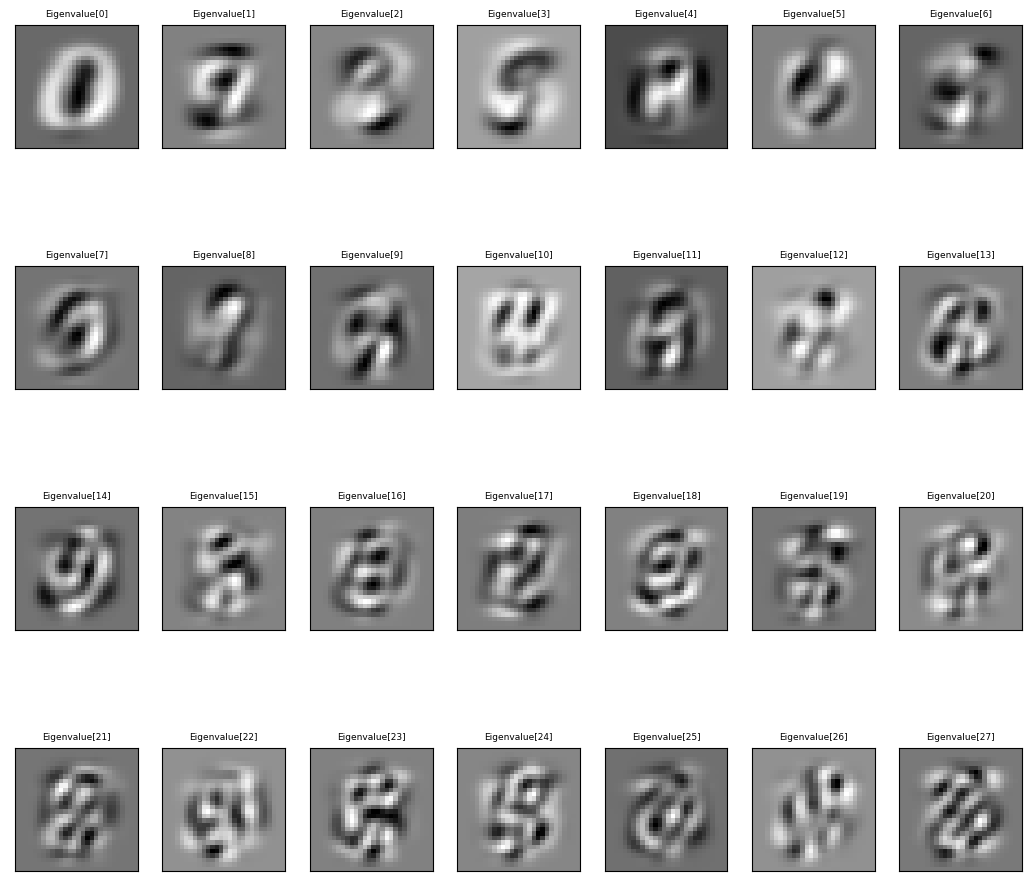

In [18]:
n_row, n_col = 4, 7

# plot eignevalues
plt.figure(figsize=(13, 12))
for i in range(n_row * n_col):
    offset = 0
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(eigenvalues[i].reshape(28, 28), cmap='gray')
    title_text = f'Eigenvalue[{i}]'
    plt.title(title_text, size=6.5)
    plt.xticks(())
    plt.yticks(())

plt.show()